In [ ]:
pip install wandb

In [ ]:
pip install ultralytics

In [3]:
import wandb
wandb.init(mode='disabled')

In [ ]:
import tensorflow as tf
import os
import glob
import random
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from ultralytics import YOLO

In [5]:
import kagglehub

# Download latest version
data_path = kagglehub.dataset_download("nimapourmoradi/car-plate-detection-yolov8")

print("Path to dataset files:", data_path)

100%|██████████| 19.3M/19.3M [00:00<00:00, 94.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/1


In [6]:
train_path = "/root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/1/Persian_Car_Plates_YOLOV8/train"
val_path = "/root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/1/Persian_Car_Plates_YOLOV8/valid"
test_path = "/root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/1/Persian_Car_Plates_YOLOV8/test"

def count_images_and_labels(path):
  images = glob.glob(os.path.join(path + '/images' , '*.jpg'))
  labels = glob.glob(os.path.join(path + '/labels' , '*.txt'))
  return len(images) , len(labels)

train_images_count, train_labels_count = count_images_and_labels(train_path)
val_images_count, val_labels_count = count_images_and_labels(val_path)
test_images_count, test_labels_count = count_images_and_labels(test_path)

print('the number of train_images : {} , the number of train_labels : {}'.format(train_images_count , train_labels_count))
print('the number of validation_images : {} , the number of validation_labels : {}'.format(val_images_count , val_labels_count))
print('the number of test_images : {} , the number of test_labels : {}'.format(test_images_count , test_labels_count))

print('the number of all images and labels : {}'.format(train_images_count + val_images_count + test_images_count))

the number of train_images : 219 , the number of train_labels : 219
the number of validation_images : 63 , the number of validation_labels : 63
the number of test_images : 31 , the number of test_labels : 31
the number of all images and labels : 313


In [7]:
height = 640
width = 640
def text_to_bbox(path):
  bbox = open(path , 'r').read().split()[1:]
  p1 = float(bbox[0]) * height , float(bbox[1]) * width
  p2 = float(bbox[2]) * height , float(bbox[3]) * width
  p3 = float(bbox[4]) * height , float(bbox[5]) * width
  p4 = float(bbox[6]) * height , float(bbox[7]) * width
  pts = np.array([p1,p2,p3,p4] , np.int32)
  return pts

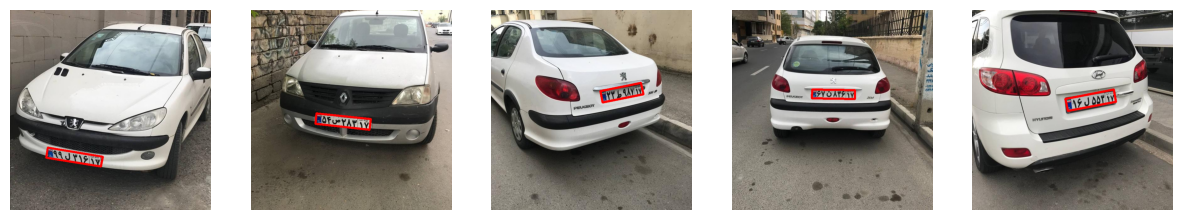

In [8]:
def plot_random_images(path , n=5):
  images = sorted(glob.glob(os.path.join(train_path + '/images' , '*.jpg')))
  labels = sorted(glob.glob(os.path.join(train_path + '/labels' , '*.txt')))
  random_indices = random.sample(range(len(images)) , 5)
  random_images = [images[i] for i in random_indices]
  random_labels = [labels[i] for i in random_indices]

  plt.figure(figsize=(15,15))
  for i , image in enumerate(random_images):
    img = cv.imread(image)
    rgb_img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    points = text_to_bbox(random_labels[i])
    cv.polylines(rgb_img , [points] , True , (255 , 0 , 0) , 5)
    plt.subplot(1 , n , i+1)
    plt.imshow(rgb_img)
    plt.axis('off')
  plt.show()

plot_random_images(train_path)

In [9]:
data_yaml_path = os.path.join('/root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/1/Persian_Car_Plates_YOLOV8/data.yaml')
yolo_model_plate_detection = YOLO('yolov8n-obb.yaml').load('yolov8n.pt')

result = yolo_model_plate_detection.train(data=data_yaml_path, epochs=40, amp=False)

100%|██████████| 6.25M/6.25M [00:00<00:00, 126MB/s]

Transferred 355/397 items from pretrained weights


Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=yolov8n-obb.yaml, data=/root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/1/Persian_Car_Plates_YOLOV8/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=yolov8n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

100%|██████████| 755k/755k [00:00<00:00, 21.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/1/Persian_Car_Plates_YOLOV8/train/labels... 219 images, 0 backgrounds, 0 corrupt: 100%|██████████| 219/219 [00:00<00:00, 1678.77it/s]

train: New cache created: /root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/1/Persian_Car_Plates_YOLOV8/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/1/Persian_Car_Plates_YOLOV8/valid/labels... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<00:00, 1391.62it/s]

val: New cache created: /root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/1/Persian_Car_Plates_YOLOV8/valid/labels.cache


Plotting labels to runs/obb/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/obb/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      3.96G      2.505      4.339      4.172         21        640: 100%|██████████| 14/14 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all         63         63    0.00159      0.476    0.00257   0.000434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      3.71G      1.727      2.687      3.081         22        640: 100%|██████████| 14/14 [00:04<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all         63         63    0.00196      0.587     0.0182    0.00306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      3.71G      1.342      2.001       2.87         20        640: 100%|██████████| 14/14 [00:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]

                   all         63         63    0.00286      0.857      0.044     0.0166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      3.71G      1.161       1.66      2.659         21        640: 100%|██████████| 14/14 [00:05<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all         63         63      0.779      0.392      0.674      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      3.71G      1.176      1.538      2.372         18        640: 100%|██████████| 14/14 [00:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all         63         63      0.943      0.785      0.962      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      3.71G      1.104       1.33      2.385         21        640: 100%|██████████| 14/14 [00:06<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all         63         63      0.951      0.926      0.986      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      3.71G      1.173      1.294      2.241         23        640: 100%|██████████| 14/14 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]

                   all         63         63      0.962        0.8       0.97      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      3.71G      1.047      1.218      2.277         17        640: 100%|██████████| 14/14 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all         63         63      0.984      0.991      0.995      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      3.71G      1.022      1.117      2.308         16        640: 100%|██████████| 14/14 [00:04<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]

                   all         63         63      0.997      0.984      0.995      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      3.71G     0.9572      1.021      2.196         21        640: 100%|██████████| 14/14 [00:04<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all         63         63      0.966      0.952      0.983      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      3.71G     0.9542      1.057      2.125         24        640: 100%|██████████| 14/14 [00:05<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all         63         63      0.984      0.981      0.987      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      3.71G     0.9449     0.9559      2.223         22        640: 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]

                   all         63         63      0.983          1      0.995      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      3.71G     0.9144     0.8755      2.109         24        640: 100%|██████████| 14/14 [00:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all         63         63      0.983          1      0.995      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      3.71G     0.9787       0.95      2.304         17        640: 100%|██████████| 14/14 [00:04<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]

                   all         63         63      0.997          1      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      3.71G     0.8929     0.8764      2.248         21        640: 100%|██████████| 14/14 [00:04<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all         63         63      0.996          1      0.995      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      3.71G     0.8181      0.797      2.006         16        640: 100%|██████████| 14/14 [00:05<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all         63         63      0.983          1      0.994      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      3.71G     0.7778     0.7592      1.988         23        640: 100%|██████████| 14/14 [00:04<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]


                   all         63         63      0.988          1      0.995      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      3.71G     0.8178     0.7328       1.86         18        640: 100%|██████████| 14/14 [00:04<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]

                   all         63         63      0.984          1      0.995      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      3.71G     0.7592     0.7657      1.969         17        640: 100%|██████████| 14/14 [00:04<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]

                   all         63         63      0.984          1      0.995      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      3.71G     0.7423     0.7237      2.013         19        640: 100%|██████████| 14/14 [00:04<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.20it/s]

                   all         63         63      0.982          1       0.99      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      3.71G      0.741     0.6838      1.946         19        640: 100%|██████████| 14/14 [00:04<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all         63         63      0.991          1      0.995      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      3.71G     0.7849     0.6868      1.946         19        640: 100%|██████████| 14/14 [00:04<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]

                   all         63         63      0.984          1      0.995      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      3.71G     0.6853     0.6456      1.903         19        640: 100%|██████████| 14/14 [00:04<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.36it/s]

                   all         63         63      0.982          1      0.995      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      3.71G     0.6574     0.6261      1.916         17        640: 100%|██████████| 14/14 [00:05<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.72it/s]

                   all         63         63      0.982          1      0.995      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      3.71G     0.7191     0.6219      1.905         15        640: 100%|██████████| 14/14 [00:04<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]

                   all         63         63      0.982          1      0.995      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      3.71G     0.7447     0.6404       2.03         17        640: 100%|██████████| 14/14 [00:04<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all         63         63      0.983          1      0.994      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      3.71G     0.7005     0.6011       1.83         22        640: 100%|██████████| 14/14 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]

                   all         63         63      0.983          1      0.995        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      3.71G     0.6334     0.5811      1.745         24        640: 100%|██████████| 14/14 [00:04<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]

                   all         63         63      0.991          1      0.995      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      3.71G     0.6311     0.5699      1.852         18        640: 100%|██████████| 14/14 [00:05<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all         63         63      0.994          1      0.995      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      3.71G     0.6104     0.5559      1.771         16        640: 100%|██████████| 14/14 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all         63         63      0.992          1      0.995      0.901


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      3.78G      0.521     0.5586      2.134         11        640: 100%|██████████| 14/14 [00:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all         63         63      0.995          1      0.995      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      3.71G     0.6016     0.5875      2.101         11        640: 100%|██████████| 14/14 [00:04<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all         63         63      0.993          1      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      3.71G     0.5302     0.5617      1.935         11        640: 100%|██████████| 14/14 [00:04<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.56it/s]

                   all         63         63      0.995          1      0.995      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      3.71G     0.5103     0.5262      1.966         11        640: 100%|██████████| 14/14 [00:05<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.69it/s]

                   all         63         63      0.993          1      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      3.71G     0.4971     0.5296      1.961         11        640: 100%|██████████| 14/14 [00:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]

                   all         63         63      0.992          1      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      3.71G     0.4824     0.5127      1.919         11        640: 100%|██████████| 14/14 [00:04<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all         63         63      0.997          1      0.995      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      3.71G     0.4632      0.501      2.135         11        640: 100%|██████████| 14/14 [00:04<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]

                   all         63         63      0.996          1      0.995      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      3.71G     0.4761     0.5013      2.024         11        640: 100%|██████████| 14/14 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all         63         63      0.996          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      3.71G     0.4725      0.495      2.047         11        640: 100%|██████████| 14/14 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all         63         63      0.996          1      0.995      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      3.71G     0.4593     0.5015        2.1         11        640: 100%|██████████| 14/14 [00:04<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.20it/s]

                   all         63         63      0.995          1      0.995      0.928



40 epochs completed in 0.076 hours.
Optimizer stripped from runs/obb/train/weights/last.pt, 7.0MB
Optimizer stripped from runs/obb/train/weights/best.pt, 7.0MB

Validating runs/obb/train/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-obb summary (fused): 187 layers, 3,077,414 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]


                   all         63         63      0.996          1      0.995      0.937
Speed: 0.3ms preprocess, 4.3ms inference, 0.0ms loss, 12.5ms postprocess per image
Results saved to runs/obb/train


In [10]:
best_model_path = os.path.join('/content/runs/obb/train/weights/best.pt')
best_model_plate = YOLO(best_model_path)

In [11]:
result_test = best_model_plate.val()

Ultralytics 8.3.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-obb summary (fused): 187 layers, 3,077,414 parameters, 0 gradients, 8.3 GFLOPs


val: Scanning /root/.cache/kagglehub/datasets/nimapourmoradi/car-plate-detection-yolov8/versions/1/Persian_Car_Plates_YOLOV8/valid/labels.cache... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


                   all         63         63      0.996          1      0.995      0.937
Speed: 0.3ms preprocess, 7.5ms inference, 0.0ms loss, 13.1ms postprocess per image
Results saved to runs/obb/val


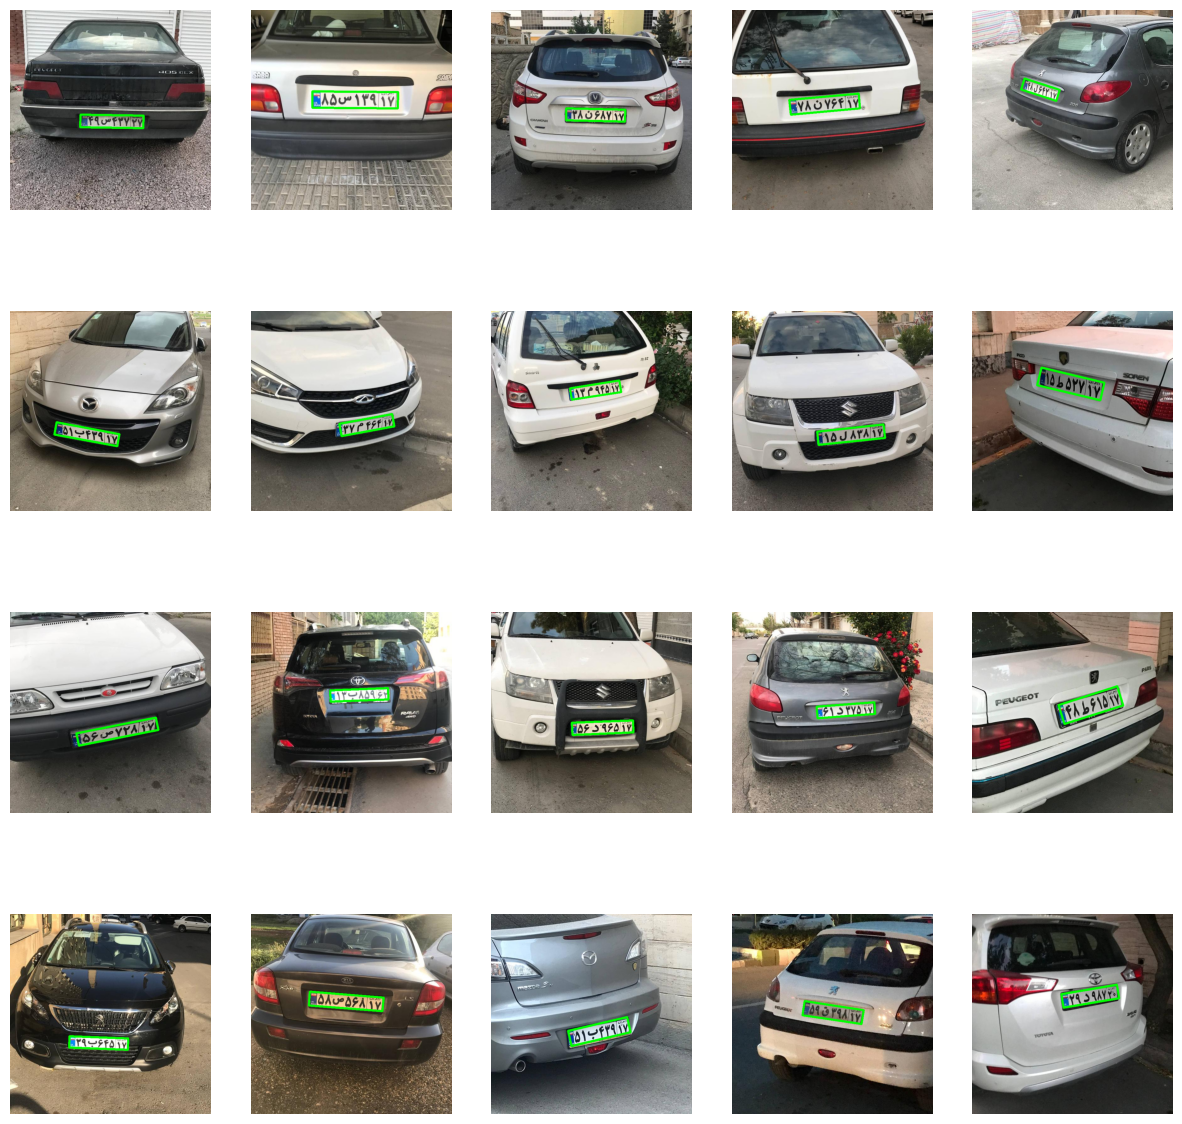

In [29]:
classNames = ['plate']

images = sorted(glob.glob(os.path.join(test_path + '/images' , '*.jpg')))
labels = sorted(glob.glob(os.path.join(test_path + '/labels' , '*.txt')))
random_indices = random.sample(range(len(images)) , 20)
random_images = [images[i] for i in random_indices]
random_labels = [labels[i] for i in random_indices]

plt.figure(figsize=(15,15))
for i , image in enumerate(random_images):
  img = cv.imread(image)
  '''points = text_to_bbox(random_labels[i])
  cv.polylines(img , [points] , True , (255 , 0 , 0) , 5)'''
  predicted_points = best_model_plate(image , verbose=False)
  for r in predicted_points:
    for box in r.obb.data:
      x_center, y_center, width, height, angle, confidence, class_id = box
      x_center, y_center, width, height, angle = float(x_center), float(y_center), float(width), float(height), float(angle)

      rect = ((x_center, y_center), (width, height), np.degrees(angle))
      box_points = cv.boxPoints(rect)
      box_points = np.intp(box_points)

      cv.drawContours(img, [box_points], 0, (0, 255, 0), 5)

  plt.subplot(4 , 5 , i+1)
  plt.imshow(img[...,::-1])
  plt.axis('off')
plt.show()

In [27]:
import pandas as pd
data = pd.read_csv('/content/runs/obb/train/results.csv')
data

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,16.2857,2.50490,4.33851,4.17154,0.00159,0.47619,0.00257,0.00043,3.44348,5.08928,3.32300,0.000260,0.000260,0.000260
1,2,23.5044,1.72660,2.68679,3.08060,0.00196,0.58730,0.01817,0.00306,3.19008,4.98444,3.05205,0.000527,0.000527,0.000527
2,3,29.7708,1.34179,2.00126,2.86957,0.00286,0.85714,0.04396,0.01660,2.58496,4.76040,3.01311,0.000779,0.000779,0.000779
3,4,37.0858,1.16090,1.65994,2.65920,0.77917,0.39215,0.67411,0.33939,1.83708,3.60412,3.11536,0.001018,0.001018,0.001018
4,5,43.3780,1.17646,1.53754,2.37234,0.94279,0.78485,0.96164,0.59666,1.28508,2.66797,2.89798,0.001243,0.001243,0.001243
5,6,52.3558,1.10413,1.33030,2.38451,0.95106,0.92554,0.98563,0.58422,1.33210,2.09643,2.83721,0.001455,0.001455,0.001455
6,7,58.1182,1.17288,1.29352,2.24090,0.96181,0.79964,0.96953,0.69192,1.02185,2.13517,2.93718,0.001652,0.001652,0.001652
7,8,64.8243,1.04729,1.21815,2.27738,0.98424,0.99150,0.99453,0.72897,0.97917,1.83519,2.55015,0.001654,0.001654,0.001654
8,9,71.1374,1.02246,1.11651,2.30764,0.99666,0.98413,0.99484,0.78665,0.82108,1.36145,2.56946,0.001604,0.001604,0.001604
9,10,77.0109,0.95722,1.02132,2.19590,0.96572,0.95238,0.98277,0.73169,0.95835,1.41630,2.26818,0.001554,0.001554,0.001554
